<a href="https://colab.research.google.com/github/DeniseBarbosa/Projeto-Case-Empresas-Unicornios/blob/main/Projeto_Unicornios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Importar as libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
#ler os dados
Base_Dados = pd.read_csv('/content/Startups+in+2021+end.csv')

#Verificar a dimensão
Base_Dados.shape

(936, 8)

In [12]:
#936 linhas e 8 colunas 

#Verificando os primeiros registros 

Base_Dados.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [13]:
#Verificando as colunas existentes 
Base_Dados.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [14]:
#Renomear as colunas 
Base_Dados.rename(columns={
    'Unnamed: 0':'Id',
    'Company': 'Empresa',
    'Valuation ($B)': 'Valor ($)',
    'Date Joined':'Data de Adesão',
    'Country': 'País',
    'City': 'Cidade', 
    'Industry': 'Setor',
    'Select Investors': 'Investidores',

}, inplace=True)

In [18]:
#Verificar o tipo da informação
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              936 non-null    int64 
 1   Empresa         936 non-null    object
 2   Valor ($)       936 non-null    object
 3   Data de Adesão  936 non-null    object
 4   País            936 non-null    object
 5   Cidade          921 non-null    object
 6   Setor           936 non-null    object
 7   Investidores    935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [19]:
#Verificar campos nulos
Base_Dados.isnull()

,Id,Empresa,Valor ($),Data de Adesão,País,Cidade,Setor,Investidores
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
931,False,False,False,False,False,False,False,False
932,False,False,False,False,False,False,False,False
933,False,False,False,False,False,False,False,False
934,False,False,False,False,False,False,False,False


In [20]:
#Verificar campos nulos
Base_Dados.isnull().sum()

Id                 0
Empresa            0
Valor ($)          0
Data de Adesão     0
País               0
Cidade            15
Setor              0
Investidores       1
dtype: int64

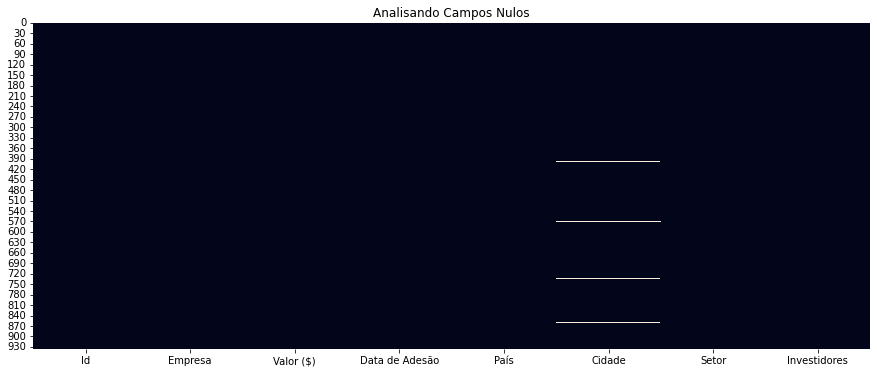

In [21]:
#Fazer uma visão gráfica use tambem o ; para anular a mensagem que aparece em cima
plt.figure(figsize=(15,6)) #alterando largura e altura
plt.title('Analisando Campos Nulos') #Colocando um título
sns.heatmap(Base_Dados.isnull(), cbar=False); # cbar=False retira a barra de escala,

In [22]:
#Quantos campos únicos tem na base de dados inteira
Base_Dados.nunique()

Id                936
Empresa           935
Valor ($)         192
Data de Adesão    589
País               47
Cidade            239
Setor              17
Investidores      920
dtype: int64

In [23]:
#Valor único
Base_Dados['Setor'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [24]:
#vai pegar os valores únicos e vai contar quantos registros tem na base de dados  Rank
Base_Dados['Setor'].value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Setor, dtype: int64

In [25]:
#vai pegar os valores únicos e vai contar quantos registros tem na base de dados  Rank
Base_Dados['Setor'].value_counts(normalize=True) #para ser analisado das duas formas 

Fintech                                0.202991
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Supply chain, logistics, & delivery    0.054487
Other                                  0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Finttech                               0.001068
Name: Setor, dtype: float64

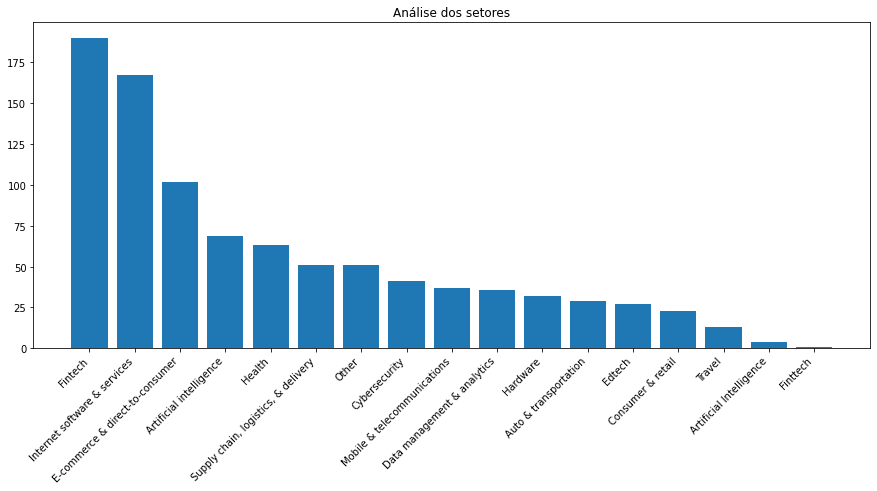

In [26]:
#fazendo de uma forma mais vizual 
plt.figure(figsize=(15,6)) #alterando largura e altura
plt.title('Análise dos setores') #Colocando um título
plt.bar(Base_Dados['Setor'].value_counts().index,Base_Dados['Setor'].value_counts())
plt.xticks(rotation= 45, ha ='right');#fez a inversão dos valores para não ficar tão amontoados

In [27]:
#Verificando o rank de paises que mais gera unicórnios no mundo.
Base_Dados['País'].value_counts()

United States           477
China                   169
India                    51
United Kingdom           37
Germany                  23
Israel                   21
France                   19
Canada                   15
Brazil                   15
South Korea              11
Singapore                11
Hong Kong                 7
Japan                     6
Australia                 6
Mexico                    5
Netherlands               5
Indonesia                 4
Spain                     4
Sweden                    4
Switzerland               4
Ireland                   3
United Arab Emirates      3
Norway                    3
Belgium                   2
Thailand                  2
Denmark                   2
Philippines               2
Finland                   2
Colombia                  2
South Africa              2
Turkey                    2
Austria                   2
Chile                     1
Malaysia                  1
Czech Republic            1
United States,      

In [28]:
#Criando uma visualiozação melhor da análise de ranks
#criando uma variavel Analisar
Analise = round(Base_Dados['País'].value_counts(normalize=True)*100,1)

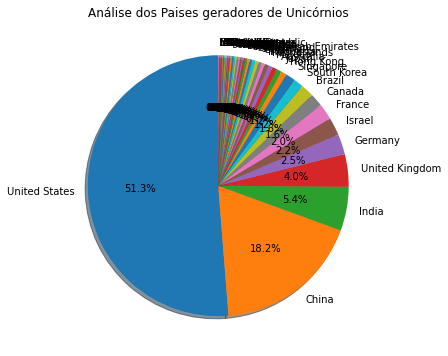

In [29]:
#Plot geral dos paises
plt.figure(figsize=(15,6))
plt.title('Análise dos Paises geradores de Unicórnios')
plt.pie(
    Analise,
    labels= Analise.index,#nota-se que esse cod é um complemento da variavel de cima
    shadow =True,
    startangle=90,
    autopct='%1.1f%%'
);

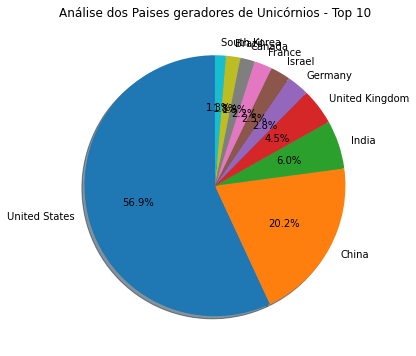

In [30]:
#Plot geral dos paises
plt.figure(figsize=(15,6))
plt.title('Análise dos Paises geradores de Unicórnios - Top 10')
plt.pie(
    Analise.head(10),#pega os 10 primeiros registros 
    labels= Analise.index[0:10],#vai pegar do 0 até a posição 10 do índice da lista 
    shadow =True,
    startangle=90,
    autopct='%1.1f%%'
);

In [31]:
#Fazer uma analise por ano na formação de unicórnios , contudo, precisamos primeiro formatar a data.
#Converção para a data
Base_Dados['Data de Adesão'] = pd.to_datetime(Base_Dados['Data de Adesão'])
Base_Dados['Data de Adesão'].head()

0   2017-04-07
1   2012-12-01
2   2014-01-23
3   2011-12-12
4   2018-01-08
Name: Data de Adesão, dtype: datetime64[ns]

In [32]:
#Extrair o ano e o mês
Base_Dados['Mês'] = pd.DatetimeIndex(Base_Dados['Data de Adesão']).month # foi criando uma nova coluna chamadan mês
Base_Dados['Ano'] = pd.DatetimeIndex(Base_Dados['Data de Adesão']).year # foi criando uma nova coluna chamadan ano

Base_Dados.head() #visualização

,Id,Empresa,Valor ($),Data de Adesão,País,Cidade,Setor,Investidores,Mês,Ano
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [33]:
#Tabela analitica
Analise_Agrupada = Base_Dados.groupby(by=['País','Ano','Mês','Empresa']).count()['Id'].reset_index()
Analise_Agrupada

,País,Ano,Mês,Empresa,Id
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
931,United States,2021,12,Panther Labs,1
932,United States,2021,12,ReliaQuest,1
933,United States,2021,12,YipitData,1
934,"United States,",2021,9,TrialSpark,1


In [34]:
#Localizando quais anos o Brasil gerou unicórnios e quais foram essas empresas
Analise_Agrupada.loc[
  Analise_Agrupada['País'] == 'Brazil'
]

,País,Ano,Mês,Empresa,Id
12,Brazil,2018,3,Nubank,1
13,Brazil,2018,7,Movile,1
14,Brazil,2018,11,iFood,1
15,Brazil,2019,6,Loggi,1
16,Brazil,2019,9,QuintoAndar,1
17,Brazil,2019,10,EBANX,1
18,Brazil,2019,12,Wildlife Studios,1
19,Brazil,2020,1,Loft,1
20,Brazil,2020,12,C6 Bank,1
21,Brazil,2020,12,Creditas,1


In [35]:
# Aqui foi feito a Substituição do $ para uma string vazia e tambem foi convertido o número para ponto flutuante ou float
Base_Dados['Valor ($)'] = pd.to_numeric(Base_Dados['Valor ($)'].apply(lambda linha:linha.replace('$','')))
Base_Dados.head()


,Id,Empresa,Valor ($),Data de Adesão,País,Cidade,Setor,Investidores,Mês,Ano
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [37]:
#Quero descobri quanto o setor de Fintech vale e quais dos países top 10 tem de valor de mercado.
Analise_Pais = Base_Dados.groupby( by=['País']).sum()['Valor ($)'].reset_index()
Analise_Pais.head()

,País,Valor ($)
0,Argentina,2.45
1,Australia,50.60
2,Austria,5.81
3,Belgium,7.55
4,Bermuda,1.60


In [39]:
#Valor eixo complemento do de cima, pega do maior para o menor. Obs: Quando o Brasil é avaliado em valor eixo ele esta em sexto lugar
Analise_Valor = Analise_Pais.sort_values('Valor ($)', ascending=False)
Analise_Valor.head()

,País,Valor ($)
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63


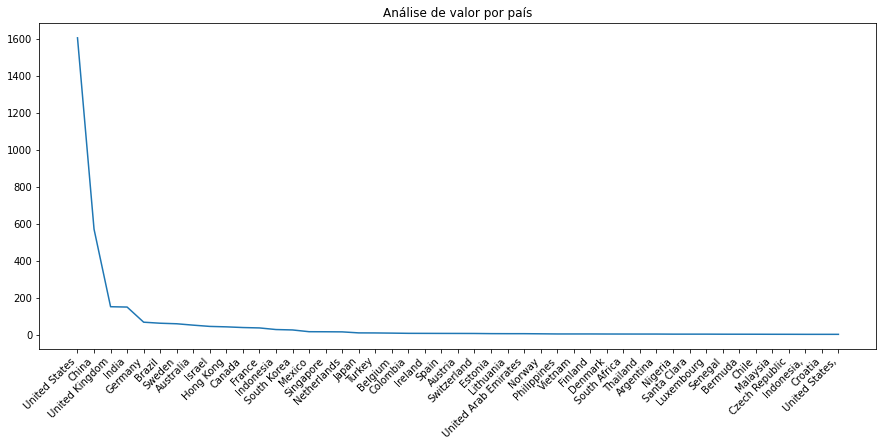

In [41]:
#Uma melhor visualização em gráfico, complementado a análise de cima.
plt.figure(figsize = (15,6))
plt.title('Análise de valor por país')
plt.plot(Analise_Valor['País'], Analise_Valor['Valor ($)'])
plt.xticks(rotation=45, ha='right');
